<a href="https://colab.research.google.com/github/Chung-god/commerceAnaly/blob/main/E_commerce.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import pandas as pd

# 데이터 불러오기
data = pd.read_csv('/Train.csv')

# 데이터 구조 확인
print(data.info())       # 열 정보 및 데이터 타입
print(data.head())       # 상위 5개 행 출력
print(data.describe())   # 통계 요약
print(data.columns)      # 열 이름 출력
print(data.isnull().sum()) # 결측치 확인


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   10999 non-null  int64 
 1   Warehouse_block      10999 non-null  object
 2   Mode_of_Shipment     10999 non-null  object
 3   Customer_care_calls  10999 non-null  int64 
 4   Customer_rating      10999 non-null  int64 
 5   Cost_of_the_Product  10999 non-null  int64 
 6   Prior_purchases      10999 non-null  int64 
 7   Product_importance   10999 non-null  object
 8   Gender               10999 non-null  object
 9   Discount_offered     10999 non-null  int64 
 10  Weight_in_gms        10999 non-null  int64 
 11  Reached.on.Time_Y.N  10999 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.0+ MB
None
   ID Warehouse_block Mode_of_Shipment  Customer_care_calls  Customer_rating  \
0   1               D           Flight                    4           

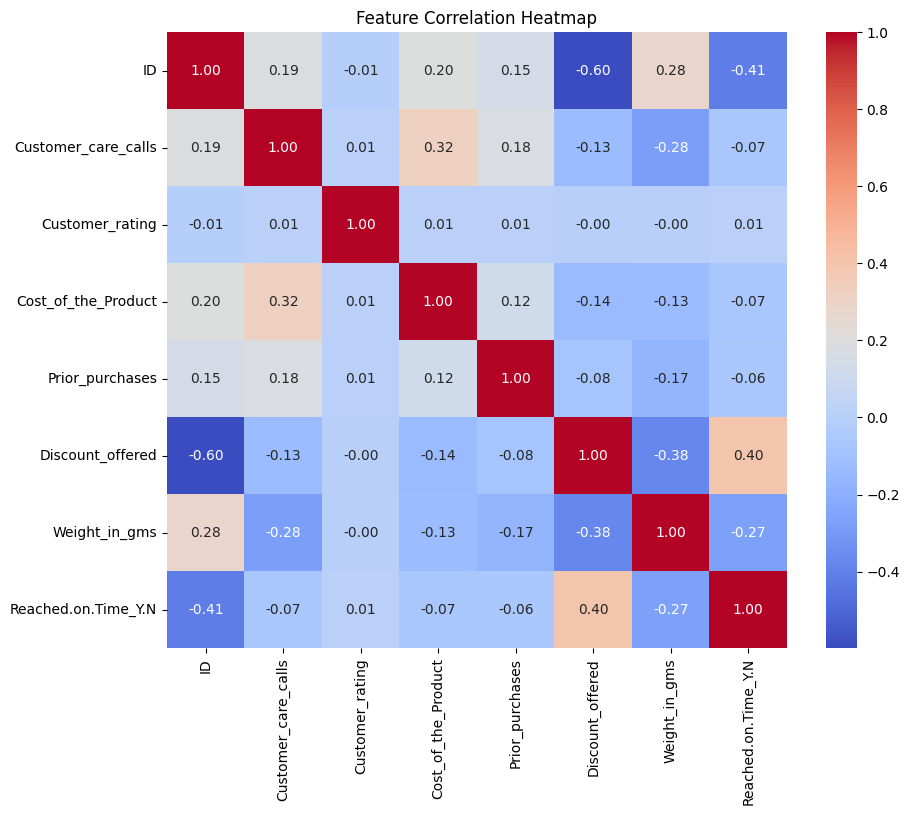

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 불러오기
data = pd.read_csv('/Train.csv')

# 숫자형 열만 선택
numeric_data = data.select_dtypes(include=['number'])

# 상관관계 분석
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


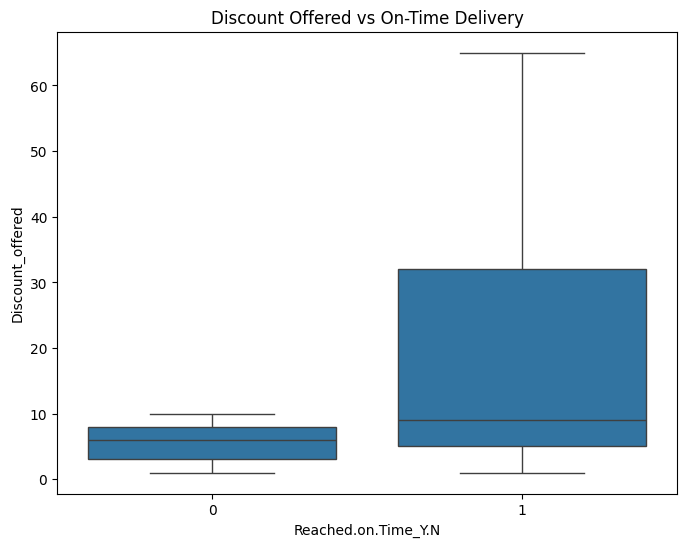

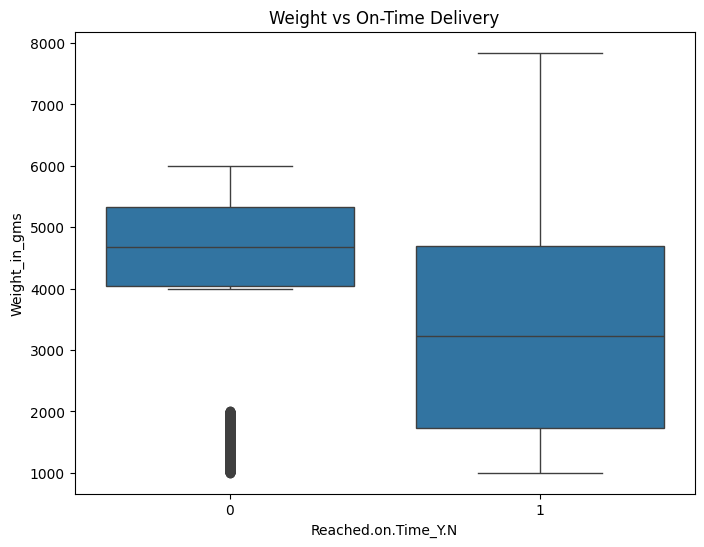

In [ ]:
# 할인율과 배송 지연 관계
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Discount_offered', data=data)
plt.title('Discount Offered vs On-Time Delivery')
plt.show()

# 제품 무게와 배송 지연 관계
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Weight_in_gms', data=data)
plt.title('Weight vs On-Time Delivery')
plt.show()


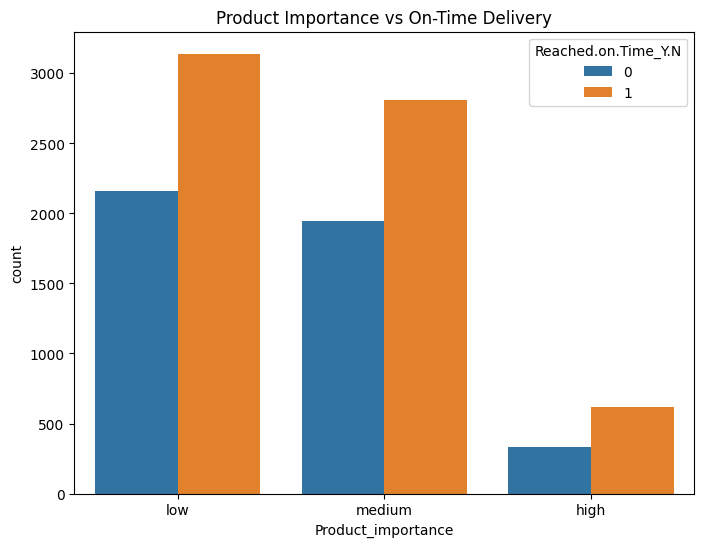

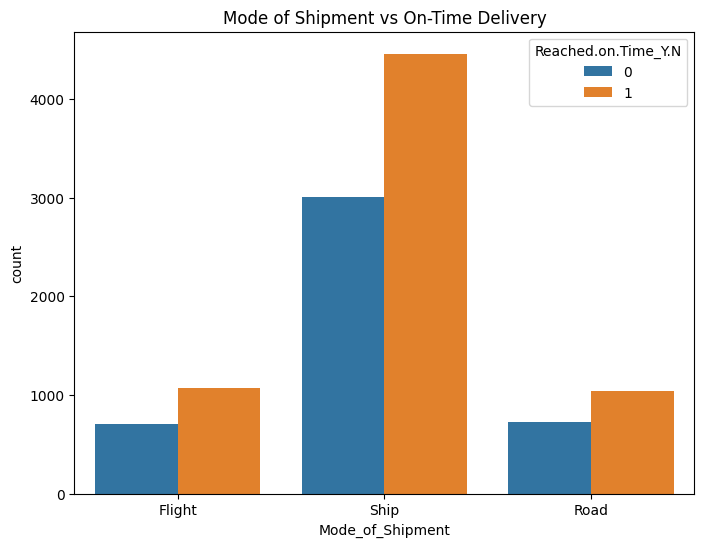

In [ ]:
# 제품 중요도에 따른 배송 지연
plt.figure(figsize=(8, 6))
sns.countplot(x='Product_importance', hue='Reached.on.Time_Y.N', data=data)
plt.title('Product Importance vs On-Time Delivery')
plt.show()

# 배송 방식에 따른 지연 분석
plt.figure(figsize=(8, 6))
sns.countplot(x='Mode_of_Shipment', hue='Reached.on.Time_Y.N', data=data)
plt.title('Mode of Shipment vs On-Time Delivery')
plt.show()


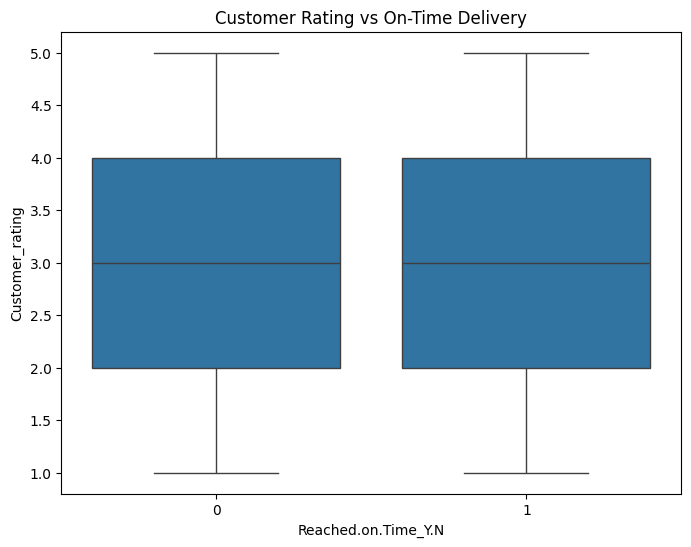

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Reached.on.Time_Y.N', y='Customer_rating', data=data)
plt.title('Customer Rating vs On-Time Delivery')
plt.show()


In [ ]:
# 결측치 확인
print(data.isnull().sum())

# 이상치 필터링
Q1 = data['Weight_in_gms'].quantile(0.25)
Q3 = data['Weight_in_gms'].quantile(0.75)
IQR = Q3 - Q1

#범위 1.5배 크기로 확장하여 정상 데이터 확인
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data = data[(data['Weight_in_gms'] >= lower_bound) & (data['Weight_in_gms'] <= upper_bound)]
print(data.shape)

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64
(10999, 12)


In [ ]:
from sklearn.preprocessing import StandardScaler
#StandardScaler는 표준화를 수행하는 도구

#객체 생성, 데이터를 평균 0, 표준편차 1로 변환
scaler = StandardScaler()
data[['Cost_of_the_Product', 'Weight_in_gms']] = scaler.fit_transform(
    data[['Cost_of_the_Product', 'Weight_in_gms']]
)


In [ ]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     10999 non-null  int64   
 1   Warehouse_block        10999 non-null  object  
 2   Customer_care_calls    10999 non-null  int64   
 3   Customer_rating        10999 non-null  int64   
 4   Cost_of_the_Product    10999 non-null  int64   
 5   Prior_purchases        10999 non-null  int64   
 6   Product_importance     10999 non-null  object  
 7   Gender                 10999 non-null  object  
 8   Discount_offered       10999 non-null  int64   
 9   Weight_in_gms          10999 non-null  int64   
 10  Reached.on.Time_Y.N    10999 non-null  int64   
 11  High_discount          10999 non-null  int64   
 12  Importance_score       10999 non-null  int64   
 13  Risk_score             10999 non-null  int64   
 14  Weight_category        10991 non-null 

In [ ]:
import numpy as np


# 1. 할인율과 배송 지연 관계 (Discount Offered vs On-Time Delivery)
# 높은 할인율이 지연 위험을 증가시킬 수 있다는 가설 기반 변수 생성

data['High_discount'] = (data['Discount_offered'] > data['Discount_offered'].median()).astype(int)

# 할인율 위험 점수 (할인율 * 중요도 반영)
importance_mapping = {'low': 1, 'medium': 2, 'high': 3}

data['Importance_score'] = data['Product_importance'].map(importance_mapping)
data['Risk_score'] = data['Discount_offered'] * data['Importance_score']


In [ ]:

# 2. 제품 무게와 배송 지연 관계 (Weight vs On-Time Delivery)

# 무게 범주화 (경량, 중량, 초중량)
bins_weight = [0, 2000, 4000, 6000]

labels_weight = ['Light', 'Medium', 'Heavy']

data['Weight_category'] = pd.cut(data['Weight_in_gms'], bins=bins_weight, labels=labels_weight)

# 무게당 가격 (Cost_per_gram) 생성

data['Cost_per_gram'] = data['Cost_of_the_Product'] / data['Weight_in_gms']



In [ ]:
# 3. 제품 중요도에 따른 배송 지연 (Product Importance vs On-Time Delivery)

# 중요도 점수 활용 (이미 생성됨)

data['High_importance'] = (data['Product_importance'] == 'high').astype(int)



In [ ]:
# 4. 배송 방식에 따른 지연 분석 (Mode of Shipment vs On-Time Delivery)

# 배송 방식 더미 변수화

data = pd.get_dummies(data, columns=['Mode_of_Shipment'], drop_first=True)

#

In [ ]:
#  5. 기타 변수 생성

# 고객 문의 횟수 구간화

bins_calls = [0, 3, 6, 10]

labels_calls = ['Low', 'Medium', 'High']

data['Call_frequency'] = pd.cut(data['Customer_care_calls'], bins=bins_calls, labels=labels_calls)

# 반복 구매 여부

data['Repeat_customer'] = (data['Prior_purchases'] > 3).astype(int)

# Weight_category 생성

data['Weight_category'] = pd.cut(data['Weight_in_gms'],

bins=[0, 2000, 4000, 6000],

labels=['Light', 'Medium', 'Heavy'],

include_lowest=True).cat.add_categories(['Unknown'])

# Call_frequency 생성

data['Call_frequency'] = pd.cut(data['Customer_care_calls'],
bins=[0, 3, 6, 10],
labels=['Low', 'Medium', 'High'],
include_lowest=True).cat.add_categories(['Unknown']).fillna('Unknown')

# Call_frequency 숫자형 변환
call_frequency_map = {'Low': 1, 'Medium': 2, 'High': 3}
data['Call_frequency_score'] = data['Call_frequency'].map(call_frequency_map).fillna(0).astype(float)



In [ ]:
# 6. 위험도 종합 점수 (배송 지연 위험)

# 위험도 종합 점수 계산 (새로운 변수 추가)

data['Total_risk_score'] = (
data['Risk_score'] +
data['High_discount'] * 2 +      # 높은 할인율 가중치
data['High_importance'] * 3 +   # 높은 중요도 가중치
data['Weight_category'].map({'Light': 1, 'Medium': 2, 'Heavy': 3}).fillna(0) +  # 무게 영향
data['Call_frequency_score'] * 1.5 +  # 고객 문의 빈도 가중치
data['Repeat_customer'] * -2   # 반복 구매 고객 가중치 감소
)

# 결과 확인

print(data.head())

   ID Warehouse_block  Customer_care_calls  Customer_rating  \
0   1               D                    4                2   
1   2               F                    4                5   
2   3               A                    2                2   
3   4               B                    3                3   
4   5               C                    2                2   

   Cost_of_the_Product  Prior_purchases Product_importance Gender  \
0                  177                3                low      F   
1                  216                2                low      M   
2                  183                4                low      M   
3                  176                4             medium      M   
4                  184                3             medium      F   

   Discount_offered  Weight_in_gms  ...  Risk_score  Weight_category  \
0                44           1233  ...          44            Light   
1                59           3088  ...          59           